In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('complete_df.csv')
print(df.shape)
df.tail(20)


(137, 108)


,match_id,home_team,away_team,tournament,location,neutral_loc,date,local_time,gmt_time,nz_half_points,...,opp_lineout_own_total,opp_lineout_own_perc,nz_pen_conceded,nz_freekick_conceded,opp_pen_conceded,opp_freekick_conceded,nz_yellow_card,nz_red_card,opp_yellow_card,opp_red_card
117,268591,New Zealand,Argentina,RUGBY CHAMPIONSHIP,New Plymouth,0,9 September 2017,19:35,07:35,15,...,6,0.667,6,1.0,10,0.0,1,0,0,0
118,268593,New Zealand,South Africa,RUGBY CHAMPIONSHIP,North Shore City,0,16 September 2017,19:35,07:35,31,...,14,0.643,10,3.0,11,0.0,0,0,0,0
119,294312,Australia,New Zealand,NEW ZEALAND TOUR,Brisbane,0,21 October 2017,19:00,09:00,13,...,12,0.917,11,1.0,11,2.0,0,0,0,0
120,294420,France,New Zealand,NEW ZEALAND TOUR,Stade de France,0,11 November 2017,20:45,19:45,31,...,13,1.000,14,1.0,9,2.0,1,0,1,0
121,294422,Scotland,New Zealand,NEW ZEALAND TOUR,Murrayfield,0,18 November 2017,17:15,17:15,3,...,12,1.000,15,2.0,13,1.0,2,0,0,0
122,294424,Wales,New Zealand,NEW ZEALAND TOUR,Millennium Stadium,0,25 November 2017,17:15,17:15,12,...,11,0.818,11,1.0,7,2.0,1,0,0,0
123,296319,New Zealand,France,FRANCE TOUR,Auckland,0,9 June 2018,19:35,07:35,8,...,12,0.583,9,0.0,9,1.0,0,0,1,0
124,296320,New Zealand,France,FRANCE TOUR,Wellington,0,16 June 2018,19:35,07:35,21,...,19,0.737,14,1.0,14,0.0,1,0,0,1
125,296321,New Zealand,France,FRANCE TOUR,Dunedin,0,23 June 2018,19:35,07:35,21,...,10,0.800,10,1.0,7,0.0,0,0,0,0
126,298567,Australia,New Zealand,BLEDISLOE CUP / RUGBY CHAMPIONSHIP,Sydney,0,18 August 2018,19:45,09:45,5,...,13,0.385,6,NaN,9,NaN,0,0,0,0


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 108 columns):
match_id                  int64
home_team                 object
away_team                 object
tournament                object
location                  object
neutral_loc               int64
date                      object
local_time                object
gmt_time                  object
nz_half_points            int64
opp_half_points           int64
nz_final_score            int64
opp_final_score           int64
result                    object
nz_tries                  int64
opp_tries                 int64
nz_convers_made           int64
nz_covers_att             int64
opp_convers_made          int64
opp_covers_att            int64
nz_pen_made               int64
nz_pen_att                int64
opp_pen_made              int64
opp_pen_att               int64
nz_kick_goal_perc         float64
opp_kick_goal_perc        float64
nz_drop_goal_made         int64
nz_drop_goal_miss 

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.date.head()

0   2008-06-21
1   2008-07-05
2   2008-07-12
3   2008-07-26
4   2008-08-02
Name: date, dtype: datetime64[ns]

In [5]:
print(df.date.min())

print(df.date.max())

2008-06-21 00:00:00
2018-11-24 00:00:00


In [6]:
nulls = df.isnull().sum()

In [7]:
nulls[nulls.values > 0]

nz_passes                 8
opp_passes                8
nz_possession_1h         29
nz_possession_2h         29
nz_possession_total      19
opp_possession_1h        29
opp_possession_2h        29
opp_possession_total     19
nz_territory_1h          32
nz_territory_2h          32
nz_territory_total       22
opp_territory_1h         32
opp_territory_2h         32
opp_territory_total      22
nz_maul_perc             20
opp_maul_perc            11
nz_freekick_conceded     90
opp_freekick_conceded    90
dtype: int64

In [8]:
df.result.value_counts()

W    117
L     17
D      3
Name: result, dtype: int64

In [9]:
df.tail()

,match_id,home_team,away_team,tournament,location,neutral_loc,date,local_time,gmt_time,nz_half_points,...,opp_lineout_own_total,opp_lineout_own_perc,nz_pen_conceded,nz_freekick_conceded,opp_pen_conceded,opp_freekick_conceded,nz_yellow_card,nz_red_card,opp_yellow_card,opp_red_card
132,298756,Australia,New Zealand,BLEDISLOE CUP,Yokohma,1,2018-10-27,15:00,6:00,17,...,7,0.710,6,2.0,10,2.0,0,0,1,0
133,295097,Japan,New Zealand,NEW ZEALAND TOUR,Tokyo,0,2018-11-03,14:45,05:45,38,...,8,0.625,7,0.0,9,1.0,0,0,0,0
134,296610,England,New Zealand,NEW ZEALAND TOUR,Twickenham,0,2018-11-10,15:00,15:00,10,...,15,0.667,4,0.0,7,1.0,0,0,0,0
135,299414,Ireland,New Zealand,NEW ZEALAND TOUR,Lansdowne Road,0,2018-11-17,19:00,19:00,6,...,13,0.846,11,NaN,5,NaN,0,0,0,0
136,299419,Italy,New Zealand,NEW ZEALAND TOUR,Rome,0,2018-11-24,15:00,14:00,31,...,11,0.727,7,2.0,12,0.0,0,0,0,0


In [10]:
def opponent_fxn(lst):
    if lst[0] == 'New Zealand':
        return lst[1]
    else:
        return lst[0]

In [11]:
df['opp'] = df[['home_team', 'away_team']].apply(lambda x: opponent_fxn(x), axis=1)

In [12]:
df.opp.head()

0         England
1    South Africa
2    South Africa
3       Australia
4       Australia
Name: opp, dtype: object

In [13]:
df['point_diff'] = df.nz_final_score - df.opp_final_score

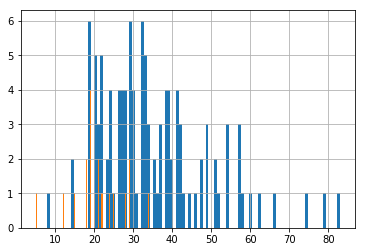

In [20]:
dfW['nz_final_score'].hist(bins=100)
dfL['nz_final_score'].hist(bins=100)

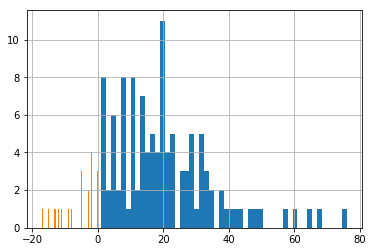

In [21]:
dfW['point_diff'].hist(bins=50)
dfL['point_diff'].hist(bins=50)

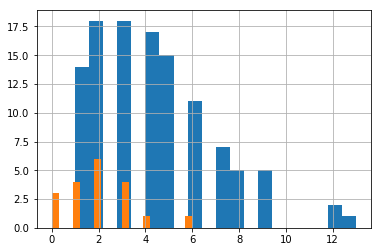

In [22]:
dfW['nz_tries'].hist(bins=20)
dfL['nz_tries'].hist(bins=20)

In [24]:
df.iloc[129,:-50]

match_id                              296324
home_team                        New Zealand
away_team                       South Africa
tournament                RUGBY CHAMPIONSHIP
location                          Wellington
neutral_loc                                0
date                     2018-09-15 00:00:00
local_time                             19:35
gmt_time                               07:35
nz_half_points                            17
opp_half_points                           24
nz_final_score                            34
opp_final_score                           36
result                                     L
nz_tries                                   6
opp_tries                                  5
nz_convers_made                            2
nz_covers_att                              6
opp_convers_made                           4
opp_covers_att                             5
nz_pen_made                                0
nz_pen_att                                 0
opp_pen_ma

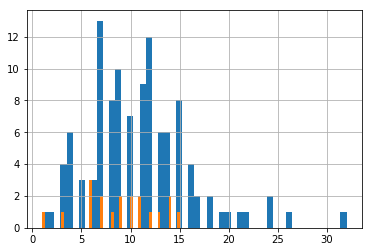

In [25]:
dfW.nz_offloads.hist(bins=50)
dfL.nz_offloads.hist(bins=50)

In [14]:
df['turnover_diff'] = df.nz_turnovers_conceded - df.opp_turnovers_conceded

In [32]:
df.columns.tolist()

['match_id',
 'home_team',
 'away_team',
 'tournament',
 'location',
 'neutral_loc',
 'date',
 'local_time',
 'gmt_time',
 'nz_1half_points',
 'opp_1half_points',
 'nz_final_score',
 'opp_final_score',
 'result',
 'nz_tries',
 'opp_tries',
 'nz_convers_made',
 'nz_covers_att',
 'opp_convers_made',
 'opp_covers_att',
 'nz_pen_made',
 'nz_pen_att',
 'opp_pen_made',
 'opp_pen_att',
 'nz_kick_goal_perc',
 'opp_kick_goal_perc',
 'nz_drop_goal_made',
 'nz_drop_goal_miss',
 'nz_drop_goal_att',
 'opp_drop_goal_made',
 'opp_drop_goal_miss',
 'opp_drop_goal_att',
 'nz_kicks_from_hand',
 'opp_kicks_from_hand',
 'nz_passes',
 'opp_passes',
 'nz_runs',
 'opp_runs',
 'nz_metres_run_w_ball',
 'opp_metres_run_w_ball',
 'nz_possession_1h',
 'nz_possession_2h',
 'nz_possession_total',
 'opp_possession_1h',
 'opp_possession_2h',
 'opp_possession_total',
 'nz_territory_1h',
 'nz_territory_2h',
 'nz_territory_total',
 'opp_territory_1h',
 'opp_territory_2h',
 'opp_territory_total',
 'nz_clean_breaks',
 'op

In [24]:
df['nz_2half_points'] = df['nz_final_score'] - df['nz_half_points']
df['opp_2half_points'] = df['opp_final_score'] - df['opp_half_points']

In [ ]:
# df.rename(columns={'nz_half_points':'nz_1half_points', 'opp_half_points':'opp_1half_points'}, inplace=True)

In [33]:
df.head()

,match_id,home_team,away_team,tournament,location,neutral_loc,date,local_time,gmt_time,nz_1half_points,...,opp_freekick_conceded,nz_yellow_card,nz_red_card,opp_yellow_card,opp_red_card,opp,point_diff,turnover_diff,nz_2half_points,opp_2half_points
0,25692,New Zealand,England,ENGLAND TOUR,Christchurch,0,2008-06-21,19:35,07:35,20,...,NaN,0,0,1,0,England,32,1,24,12
1,25701,New Zealand,South Africa,TRI NATIONS,Wellington,0,2008-07-05,19:35,07:35,9,...,NaN,0,0,0,0,South Africa,11,-3,10,0
2,25705,New Zealand,South Africa,TRI NATIONS,Dunedin,0,2008-07-12,19:35,07:35,15,...,NaN,0,0,1,0,South Africa,-2,-5,13,13
3,25707,Australia,New Zealand,TRI NATIONS,Sydney,0,2008-07-26,20:05,10:05,12,...,NaN,1,0,0,0,Australia,-15,18,7,17
4,25708,New Zealand,Australia,TRI NATIONS,Auckland,0,2008-08-02,19:35,07:35,21,...,NaN,0,0,0,0,Australia,29,-9,18,0


In [34]:
df.to_csv('clean_df_complete.csv', index=False)